# SkimLit

## Get the data

In [ ]:
!git clone https://github.com/Franck-Dernoncourt/pubmed-rct.git
!ls pubmed-rct

Cloning into 'pubmed-rct'...
remote: Enumerating objects: 33, done.
remote: Counting objects: 100% (8/8), done.
remote: Compressing objects: 100% (3/3), done.
remote: Total 33 (delta 5), reused 5 (delta 5), pack-reused 25
Receiving objects: 100% (33/33), 177.08 MiB | 34.00 MiB/s, done.
Resolving deltas: 100% (12/12), done.
PubMed_200k_RCT				       PubMed_20k_RCT_numbers_replaced_with_at_sign
PubMed_200k_RCT_numbers_replaced_with_at_sign  README.md
PubMed_20k_RCT


In [ ]:
# Check what files are in the PubMed_20K dataset
!ls pubmed-rct/PubMed_20k_RCT_numbers_replaced_with_at_sign

dev.txt  test.txt  train.txt


In [ ]:
# Start by using the 20k dataset
data_dir = "pubmed-rct/PubMed_20k_RCT_numbers_replaced_with_at_sign/"

In [ ]:
# Check all of the filenames in the target directory
import os
filenames = [data_dir + filename for filename in os.listdir(data_dir)]
filenames

['pubmed-rct/PubMed_20k_RCT_numbers_replaced_with_at_sign/train.txt',
 'pubmed-rct/PubMed_20k_RCT_numbers_replaced_with_at_sign/test.txt',
 'pubmed-rct/PubMed_20k_RCT_numbers_replaced_with_at_sign/dev.txt']

## Preprocess the data

In [ ]:
# create a function to read the lines of a document
def get_lines(filename):
  """
  Reads filename (a text file) and returns the lines of text as a list.

  Args:
    filename: a string containing the target filepath to read.

  Returns:
    A list of stings with one string per line from the target filename,
    for example:
    [This is the first line,
    "This is the second",
    "This is the third"]
  """
  with open(filename, "r") as f:
    return f.readlines()


In [ ]:
train_lines = get_lines(data_dir + "train.txt")
val_lines = get_lines(data_dir + "dev.txt")
test_lines = get_lines(data_dir + "test.txt")
train_lines[:20]

['###24293578\n',
 'OBJECTIVE\tTo investigate the efficacy of @ weeks of daily low-dose oral prednisolone in improving pain , mobility , and systemic low-grade inflammation in the short term and whether the effect would be sustained at @ weeks in older adults with moderate to severe knee osteoarthritis ( OA ) .\n',
 'METHODS\tA total of @ patients with primary knee OA were randomized @:@ ; @ received @ mg/day of prednisolone and @ received placebo for @ weeks .\n',
 'METHODS\tOutcome measures included pain reduction and improvement in function scores and systemic inflammation markers .\n',
 'METHODS\tPain was assessed using the visual analog pain scale ( @-@ mm ) .\n',
 'METHODS\tSecondary outcome measures included the Western Ontario and McMaster Universities Osteoarthritis Index scores , patient global assessment ( PGA ) of the severity of knee OA , and @-min walk distance ( @MWD ) .\n',
 'METHODS\tSerum levels of interleukin @ ( IL-@ ) , IL-@ , tumor necrosis factor ( TNF ) - , and 

Let's think about how we want our data to look...
How I think our data would be best to represent

A list of dictionaries:
```
# each dictionary in this list contains the information for one line
[{"line_number": 0,  # the number of the line in the abstrack
  "target": BACKROUND,
  "text": "Emotional eating is associeated with overeating and development od obesity.\n"
  total_lines:11},  # the total lines of the abstrack  
  {...
   ...},
  ...]
  ```

What we have to do to achive this dictionary?
1. loop throught the train_list and separate the abstracks,
2. delete the first line, the id of the abstrack for example '###24293578\n'
3. delete the last line always '\n' ---> this is the way to separate the lines
4. for each line create a dictionary such in previous code
5. ```the line_number = the line in the abstracks[number_of_abstack]```
6. to separate the targed and the text will make use of the *'tab'*, \t
7. ```total_lines = len(abstracks[number_of_abstack])```

In [ ]:
# Make a function that will create a list of dictionaries with the information per line
def preprocess_text_with_line_numbers(input_lines):
  """Returns a list of dictionaries of abstract line data.

  Args:
      input_lines: a list of the lines. you can make this list with the help of the get_lines function we have made.

  Returns:
      A list of dictionaries each containing a line from an abstract,
      the lines label, the lines position in the abstract and the total number
      of lines in the abstract where the line is from. For example:

      [{"target": 'CONCLUSION',
        "text": The study couldn't have gone better, turns out people are kinder than you think",
        "line_number": 8,
        "total_lines": 8}]
  """


  #import the re library for regular expressions
  import re


  abstracks = []  # Here we are going to store all the abstracks, each abstrack will be a list of lines
  abstrack = []  # Here we are going to store the lines of each abstrack
  pattern = r'^###\d+\n'  # the pattern of the first line in each abstrack, the id

  # 1. loop throught the input_lines and separate the abstracks
  for line in input_lines:
    if line != "\n":
      if re.match(pattern, line):
        pass  # 2. delete the first line, the id of the abstrack for example '###24293578\n'
      else:
        abstrack.append(line)
    if line == "\n":  # 3. delete the last line always '\n' ---> this is the way to separate the lines
      abstracks.append(abstrack)
      abstrack = []  # reset the abstrack list to an empty list to be ready for the next abstrack


  # Delete the \n in the end of each sentence:
  for abstrack in abstracks:
    for line_number, line in enumerate(abstrack):
      abstracks[abstracks.index(abstrack)][line_number] = line.replace("\n", "")


  data = []  # Initialize an empty list to store dictionaries.

  for abstrack in abstracks:
      for line_number, line in enumerate(abstrack):
          line_dict = {
              "line_number": line_number,
              "target": line.split("\t")[0],  # this return the first part of the split that contains the target
              "text": line.split("\t")[1],  # this return the second part of the split that contains the text
              "total_lines": len(abstrack) - 1
          }
          data.append(line_dict)  # Append the current line_dict to the data list


  return data

In [ ]:
# Create a list of dictionaries with the help of the fuction we made
train_data = preprocess_text_with_line_numbers(train_lines)
val_data = preprocess_text_with_line_numbers(val_lines)
test_data = preprocess_text_with_line_numbers(test_lines)

In [ ]:
# the first dictionary with the info for the first line
train_data[:14]

[{'line_number': 0,
  'target': 'OBJECTIVE',
  'text': 'To investigate the efficacy of @ weeks of daily low-dose oral prednisolone in improving pain , mobility , and systemic low-grade inflammation in the short term and whether the effect would be sustained at @ weeks in older adults with moderate to severe knee osteoarthritis ( OA ) .',
  'total_lines': 11},
 {'line_number': 1,
  'target': 'METHODS',
  'text': 'A total of @ patients with primary knee OA were randomized @:@ ; @ received @ mg/day of prednisolone and @ received placebo for @ weeks .',
  'total_lines': 11},
 {'line_number': 2,
  'target': 'METHODS',
  'text': 'Outcome measures included pain reduction and improvement in function scores and systemic inflammation markers .',
  'total_lines': 11},
 {'line_number': 3,
  'target': 'METHODS',
  'text': 'Pain was assessed using the visual analog pain scale ( @-@ mm ) .',
  'total_lines': 11},
 {'line_number': 4,
  'target': 'METHODS',
  'text': 'Secondary outcome measures include

In [ ]:
import pandas as pd
train_df = pd.DataFrame(train_data)
val_df = pd.DataFrame(val_data)
test_df = pd.DataFrame(test_data)

train_df.head()

,line_number,target,text,total_lines
0,0,OBJECTIVE,To investigate the efficacy of @ weeks of dail...,11
1,1,METHODS,A total of @ patients with primary knee OA wer...,11
2,2,METHODS,Outcome measures included pain reduction and i...,11
3,3,METHODS,Pain was assessed using the visual analog pain...,11
4,4,METHODS,Secondary outcome measures included the Wester...,11


## Visualize the data

In [ ]:
# disribution of labels in training data

train_df.target.value_counts()

METHODS        59353
RESULTS        57953
CONCLUSIONS    27168
BACKGROUND     21727
OBJECTIVE      13839
Name: target, dtype: int64

<Axes: ylabel='Frequency'>

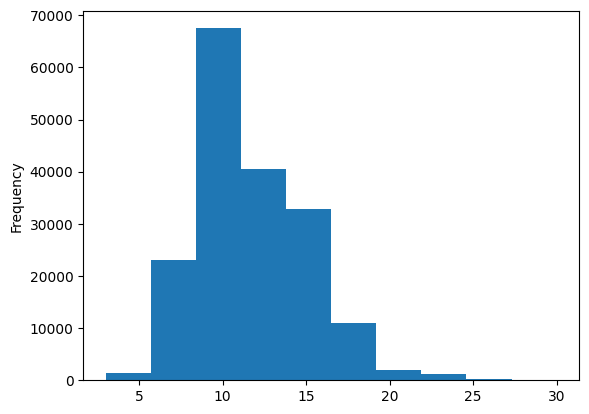

In [ ]:
train_df.total_lines.plot.hist()

### Get lists of sentences

In [ ]:
train_sentences = train_df["text"].tolist()
val_sentences = val_df["text"].tolist()
test_sentences = test_df["text"].tolist()

## Make numeric labels (ML models require numeric labels)
We're going to create one hot and label encoded labels.

### One hot encode

In [ ]:
from sklearn.preprocessing import OneHotEncoder
one_hot_encoder = OneHotEncoder(sparse=False)  # We want a non sparse matrix
train_labels_one_hot = one_hot_encoder.fit_transform(train_df["target"].to_numpy().reshape(-1, 1))
val_labels_one_hot = one_hot_encoder.fit_transform(val_df["target"].to_numpy().reshape(-1, 1))
test_labels_one_hot = one_hot_encoder.fit_transform(test_df["target"].to_numpy().reshape(-1, 1))

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [ ]:
import tensorflow as tf
tf.constant(train_labels_one_hot)

<tf.Tensor: shape=(180040, 5), dtype=float64, numpy=
array([[0., 0., 0., 1., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0.],
       ...,
       [0., 0., 0., 0., 1.],
       [0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0.]])>

### Label encode labels

In [ ]:
# Extract labels("target" columns) and encode them into integers
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
train_labels_encoded = label_encoder.fit_transform(train_df["target"].to_numpy())
val_labels_encoded = label_encoder.fit_transform(val_df["target"].to_numpy())
test_labels_encoded = label_encoder.fit_transform(test_df["target"].to_numpy())

# Check wjat training labels look like:
train_labels_encoded

array([3, 2, 2, ..., 4, 1, 1])

In [ ]:
# Get class names and number of classe from LabelEncoder instance
num_classes = len(label_encoder.classes_)
class_names = label_encoder.classes_
num_classes, class_names

(5,
 array(['BACKGROUND', 'CONCLUSIONS', 'METHODS', 'OBJECTIVE', 'RESULTS'],
       dtype=object))

## Model 0: Getting a baseline

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline

# Create a pipeline
model_0 = Pipeline([
  ("tf-idf", TfidfVectorizer()),
  ("clf", MultinomialNB())
])

# Fit the pipeline to the training data
model_0.fit(X=train_sentences,
            y=train_labels_encoded)

Pipeline(steps=[('tf-idf', TfidfVectorizer()), ('clf', MultinomialNB())])

In [ ]:
# Evaluate baseline on validation dataset
model_0.score(X=val_sentences,
              y=val_labels_encoded)


0.7218323844829869

In [ ]:
# Make predictions
baseline_preds = model_0.predict(val_sentences)
baseline_preds



array([4, 1, 3, ..., 4, 4, 1])

In [ ]:
!wget https://raw.githubusercontent.com/katsoglou/Computer_Vision-Food_Vision/main/helper_functions.py

--2023-10-30 09:59:32--  https://raw.githubusercontent.com/katsoglou/Computer_Vision-Food_Vision/main/helper_functions.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10246 (10K) [text/plain]
Saving to: ‘helper_functions.py’

helper_functions.py 100%[===================>]  10.01K  --.-KB/s    in 0.001s  

2023-10-30 09:59:32 (13.9 MB/s) - ‘helper_functions.py’ saved [10246/10246]



In [ ]:
from helper_functions import calculate_results

In [ ]:
# Calculate baseline results
baseline_results = calculate_results(y_true=val_labels_encoded,
                                     y_pred=baseline_preds)
baseline_results


{'accuracy': 72.1832384482987,
 'precision': 0.7186466952323352,
 'recall': 0.7218323844829869,
 'f1': 0.6989250353450294}

## Preparing our data for deep sequence models

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers

In [ ]:
# How long is each sentence on average?
sent_lens = [len(sentence.split()) for sentence in train_sentences]
avg_sent_len = np.mean(sent_lens)
avg_sent_len # return average sentence length (in tokens)

26.338269273494777

(array([2.5486e+04, 7.1478e+04, 4.8888e+04, 2.0260e+04, 7.5560e+03,
        3.4370e+03, 1.4950e+03, 7.3700e+02, 3.2800e+02, 1.6500e+02,
        8.5000e+01, 4.9000e+01, 2.0000e+01, 1.5000e+01, 9.0000e+00,
        6.0000e+00, 8.0000e+00, 8.0000e+00, 3.0000e+00, 2.0000e+00,
        3.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00, 1.0000e+00]),
 array([  1. ,  12.8,  24.6,  36.4,  48.2,  60. ,  71.8,  83.6,  95.4,
        107.2, 119. , 130.8, 142.6, 154.4, 166.2, 178. , 189.8, 201.6,
        213.4, 225.2, 237. , 248.8, 260.6, 272.4, 284.2, 296. ]),
 <BarContainer object of 25 artists>)

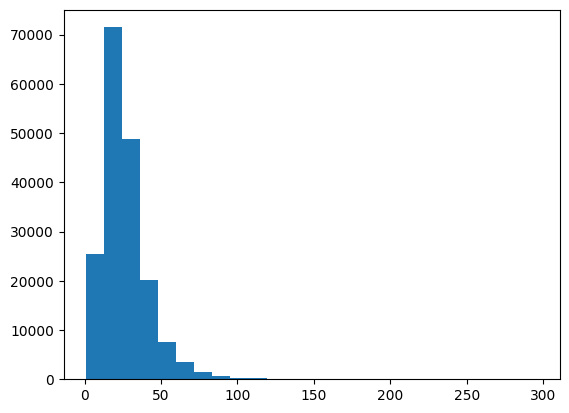

In [ ]:
# What's the distribution look like?
import matplotlib.pyplot as plt
plt.hist(sent_lens, bins=25)

In [ ]:
# How long of a sentence covers 95% of the lengths?
output_seq_len = int(np.percentile(sent_lens, 95))
output_seq_len

55

In [ ]:
# Maximum sentence length in the training set
max(sent_lens)

296

### Create text vectorizer

In [ ]:
# How many words are in our vocabulary?
max_tokens = 68000

**note:** the number is from the paper [https://arxiv.org/pdf/1710.06071.pdf](https://arxiv.org/pdf/1710.06071.pdf) in 3.2

In [ ]:
# Create text vectorizer

# After TensorFlow 2.6
from tensorflow.keras.layers import TextVectorization

text_vectorizer = TextVectorization(max_tokens=max_tokens, # number of words in vocabulary
                                    output_sequence_length=55) # desired output length of vectorized sequences

In [ ]:
# Adapt (or fit) text vectorizer to training sentences
text_vectorizer.adapt(train_sentences)

In [ ]:
# Test out text vectorizer
import random
target_sentence = random.choice(train_sentences)
print(f"Text:\n{target_sentence}")
print(f"\nLength of text: {len(target_sentence.split())}")
print(f"\nVectorized text:\n{text_vectorizer([target_sentence])}")


Text:
In multivariable analysis , young age ( i.e. , @-@ years ) ( p = @ ) , sharing needles ( p < @ ) , and incarceration in prison ( p = @ ) were associated with incident HIV infection .

Length of text: 42

Vectorized text:
[[    5  1478    85   728   103   870    64    14  6745  4365    14     3
  14872     5 13045    14     9    81     7  1959   500   360     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0]]


In [ ]:
# How many words in our training vocabulary?
rct_20k_text_vocab = text_vectorizer.get_vocabulary()
print(f"Number of words in vocabulary: {len(rct_20k_text_vocab)}"),
print(f"Most common words in the vocabulary: {rct_20k_text_vocab[:5]}")
print(f"Least common words in the vocabulary: {rct_20k_text_vocab[-5:]}")

Number of words in vocabulary: 64841
Most common words in the vocabulary: ['', '[UNK]', 'the', 'and', 'of']
Least common words in the vocabulary: ['aainduced', 'aaigroup', 'aachener', 'aachen', 'aaacp']


In [ ]:
# Get the config of our text vectorizer
text_vectorizer.get_config()

{'name': 'text_vectorization',
 'trainable': True,
 'dtype': 'string',
 'batch_input_shape': (None,),
 'max_tokens': 68000,
 'standardize': 'lower_and_strip_punctuation',
 'split': 'whitespace',
 'ngrams': None,
 'output_mode': 'int',
 'output_sequence_length': 55,
 'pad_to_max_tokens': False,
 'sparse': False,
 'ragged': False,
 'vocabulary': None,
 'idf_weights': None,
 'encoding': 'utf-8',
 'vocabulary_size': 64841}

### Create custom text embedding

In [ ]:
# Create token embedding layer
token_embed = layers.Embedding(input_dim=len(rct_20k_text_vocab), # length of vocabulary
                               output_dim=128, # Note: different embedding sizes result in drastically different numbers of parameters to train
                               # Use masking to handle variable sequence lengths (save space)
                               mask_zero=True,
                               name="token_embedding")

# Show example embedding
print(f"Sentence before vectorization:\n{target_sentence}\n")
vectorized_sentence = text_vectorizer([target_sentence])
print(f"Sentence after vectorization (before embedding):\n{vectorized_sentence}\n")
embedded_sentence = token_embed(vectorized_sentence)
print(f"Sentence after embedding:\n{embedded_sentence}\n")
print(f"Embedded sentence shape: {embedded_sentence.shape}")

Sentence before vectorization:
In multivariable analysis , young age ( i.e. , @-@ years ) ( p = @ ) , sharing needles ( p < @ ) , and incarceration in prison ( p = @ ) were associated with incident HIV infection .

Sentence after vectorization (before embedding):
[[    5  1478    85   728   103   870    64    14  6745  4365    14     3
  14872     5 13045    14     9    81     7  1959   500   360     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0]]

Sentence after embedding:
[[[-0.03395297  0.02750896 -0.02937126 ...  0.00157108 -0.03641206
   -0.02030458]
  [-0.01495018 -0.00217444  0.03589937 ...  0.0234771  -0.03337701
   -0.03771025]
  [-0.01265576  0.03015495  0.02663641 ... -0.04059877 -0.02260554
   -0.0219905 ]
  ...
  [ 0.0213199  -0.00325184  0.02040252 ... -0.0136349  -0.03243899
   -0.0432534 ]
  [ 0.0213199  -0.00325184  0

## Create datasets (as fast as possible)

In [ ]:
# Turn our data into TensorFlow Datasets
train_dataset = tf.data.Dataset.from_tensor_slices((train_sentences, train_labels_one_hot))
valid_dataset = tf.data.Dataset.from_tensor_slices((val_sentences, val_labels_one_hot))
test_dataset = tf.data.Dataset.from_tensor_slices((test_sentences, test_labels_one_hot))

train_dataset

<_TensorSliceDataset element_spec=(TensorSpec(shape=(), dtype=tf.string, name=None), TensorSpec(shape=(5,), dtype=tf.float64, name=None))>

In [ ]:
# Take the TensorSliceDataset's and turn them into prefetched batches (faster gpu compute)
train_dataset = train_dataset.batch(32).prefetch(tf.data.AUTOTUNE)
valid_dataset = valid_dataset.batch(32).prefetch(tf.data.AUTOTUNE)
test_dataset = test_dataset.batch(32).prefetch(tf.data.AUTOTUNE)

train_dataset

<_PrefetchDataset element_spec=(TensorSpec(shape=(None,), dtype=tf.string, name=None), TensorSpec(shape=(None, 5), dtype=tf.float64, name=None))>

## Model 1: Conv1D with token embeddings

All of our deep models will follow a similar structure:

1. Input (text)
2. Tokenize
3. Embedding
4. Layers
5. Output (label probability)

In [ ]:
# Create 1D convolutional model to process sequences
inputs = layers.Input(shape=(1,), dtype=tf.string)
text_vectors = text_vectorizer(inputs) # vectorize text inputs
token_embeddings = token_embed(text_vectors) # create embedding
x = layers.Conv1D(64, kernel_size=5, padding="same", activation="relu")(token_embeddings)
x = layers.GlobalAveragePooling1D()(x) # condense the output of our feature vector
outputs = layers.Dense(num_classes, activation="softmax")(x)
model_1 = tf.keras.Model(inputs, outputs)

# Compile
model_1.compile(loss="categorical_crossentropy", # if your labels are integer form (not one hot) use sparse_categorical_crossentropy
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

In [ ]:
# Get summary of Conv1D model
model_1.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 1)]               0         
                                                                 
 text_vectorization (TextVe  (None, 55)                0         
 ctorization)                                                    
                                                                 
 token_embedding (Embedding  (None, 55, 128)           8299648   
 )                                                               
                                                                 
 conv1d (Conv1D)             (None, 55, 64)            41024     
                                                                 
 global_average_pooling1d (  (None, 64)                0         
 GlobalAveragePooling1D)                                         
                                                             

In [ ]:
# Fit the model
model_1_history = model_1.fit(train_dataset,
                              steps_per_epoch=int(0.1 * len(train_dataset)), # only fit on 10% of batches for faster training time
                              epochs=3,
                              validation_data=valid_dataset,
                              validation_steps=int(0.1 * len(valid_dataset))) # only validate on 10% of batches

Epoch 1/3
562/562 [==============================] - 28s 34ms/step - loss: 0.9116 - accuracy: 0.6387 - val_loss: 0.6829 - val_accuracy: 0.7364
Epoch 2/3
562/562 [==============================] - 6s 11ms/step - loss: 0.6561 - accuracy: 0.7549 - val_loss: 0.6261 - val_accuracy: 0.7703
Epoch 3/3
562/562 [==============================] - 5s 8ms/step - loss: 0.6172 - accuracy: 0.7751 - val_loss: 0.5956 - val_accuracy: 0.7829


In [ ]:
# Evaluate on whole validation dataset (we only validated on 10% of batches during training)
model_1.evaluate(valid_dataset)

945/945 [==============================] - 3s 3ms/step - loss: 0.5992 - accuracy: 0.7856


[0.5991882085800171, 0.7856149673461914]

In [ ]:
# Make predictions (our model outputs prediction probabilities for each class)
model_1_pred_probs = model_1.predict(valid_dataset)
model_1_pred_probs

945/945 [==============================] - 3s 3ms/step


array([[4.4464087e-01, 1.6443954e-01, 9.5718868e-02, 2.6814377e-01,
        2.7056877e-02],
       [4.4781741e-01, 2.6811478e-01, 1.3791918e-02, 2.6267314e-01,
        7.6027266e-03],
       [1.3618088e-01, 9.0294955e-03, 1.4416040e-03, 8.5330278e-01,
        4.5270877e-05],
       ...,
       [3.1583659e-06, 5.4831151e-04, 3.9339144e-04, 1.7227786e-06,
        9.9905342e-01],
       [5.5858087e-02, 4.0540603e-01, 1.4406922e-01, 7.0339650e-02,
        3.2432708e-01],
       [1.4852352e-01, 6.9961911e-01, 2.7102405e-02, 4.3220866e-02,
        8.1534125e-02]], dtype=float32)

In [ ]:
# Convert pred probs to classes
model_1_preds = tf.argmax(model_1_pred_probs, axis=1)
model_1_preds

<tf.Tensor: shape=(30212,), dtype=int64, numpy=array([0, 0, 3, ..., 4, 1, 1])>

In [ ]:
# Calculate model_1 results
model_1_results = calculate_results(y_true=val_labels_encoded,
                                    y_pred=model_1_preds)
model_1_results


{'accuracy': 78.56149874222163,
 'precision': 0.7823877669370666,
 'recall': 0.7856149874222164,
 'f1': 0.7830015940230789}

## Model 2: Feature extraction with pretrained token embeddings

The model structure will look like:

1. Inputs (string)
2. Pretrained embeddings from TensorFlow Hub (Universal Sentence Encoder)
3. Layers
4. Output (prediction probabilities)

In [ ]:
# Download pretrained TensorFlow Hub USE
import tensorflow_hub as hub
tf_hub_embedding_layer = hub.KerasLayer("https://tfhub.dev/google/universal-sentence-encoder/4",
                                        trainable=False,
                                        name="universal_sentence_encoder")

In [ ]:
# Test out the embedding on a random sentence
random_training_sentence = random.choice(train_sentences)
print(f"Random training sentence:\n{random_training_sentence}\n")
use_embedded_sentence = tf_hub_embedding_layer([random_training_sentence])
print(f"Sentence after embedding:\n{use_embedded_sentence[0][:30]} (truncated output)...\n")
print(f"Length of sentence embedding:\n{len(use_embedded_sentence[0])}")

Random training sentence:
Exercise testing is more sensitive than saline loading to detect hemodynamic derangements indicative of HFpEF .

Sentence after embedding:
[-0.02110066  0.04492721  0.01530468 -0.04290213 -0.01055607  0.04988946
 -0.0440754  -0.07285142 -0.04337055  0.07896335  0.08406577  0.0043107
  0.08595553 -0.03332588  0.02219083 -0.03363296 -0.02073158  0.06473786
  0.07497977  0.0382686  -0.05635099  0.04613358 -0.06952885  0.00946277
  0.04018016  0.04293565 -0.06126588  0.0326286   0.03277563 -0.02009313] (truncated output)...

Length of sentence embedding:
512


### Building and fitting an NLP feature extraction model from TensorFlow Hub

In [ ]:
# Define feature extractor model using TF Hub layer
inputs = layers.Input(shape=[], dtype=tf.string)
pretrained_embedding = tf_hub_embedding_layer(inputs) # tokenize text and create embedding
x = layers.Dense(128, activation="relu")(pretrained_embedding) # add a fully connected layer on top of the embedding
# Note: you could add more layers here if you wanted to
outputs = layers.Dense(5, activation="softmax")(x) # create the output layer
model_2 = tf.keras.Model(inputs=inputs,
                        outputs=outputs)

# Compile the model
model_2.compile(loss="categorical_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

In [ ]:
# Get a summary of the model
model_2.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None,)]                 0         
                                                                 
 universal_sentence_encoder  (None, 512)               256797824 
  (KerasLayer)                                                   
                                                                 
 dense_1 (Dense)             (None, 128)               65664     
                                                                 
 dense_2 (Dense)             (None, 5)                 645       
                                                                 
Total params: 256864133 (979.86 MB)
Trainable params: 66309 (259.02 KB)
Non-trainable params: 256797824 (979.61 MB)
_________________________________________________________________


In [ ]:
# Fit feature extractor model for 3 epochs
model_2.fit(train_dataset,
            steps_per_epoch=int(0.1 * len(train_dataset)),
            epochs=3,
            validation_data=valid_dataset,
            validation_steps=int(0.1 * len(valid_dataset)))

Epoch 1/3
562/562 [==============================] - 11s 14ms/step - loss: 0.9189 - accuracy: 0.6511 - val_loss: 0.7937 - val_accuracy: 0.6895
Epoch 2/3
562/562 [==============================] - 8s 14ms/step - loss: 0.7692 - accuracy: 0.7010 - val_loss: 0.7539 - val_accuracy: 0.7061
Epoch 3/3
562/562 [==============================] - 8s 15ms/step - loss: 0.7527 - accuracy: 0.7126 - val_loss: 0.7378 - val_accuracy: 0.7151


In [ ]:
# Evaluate on whole validation dataset
model_2.evaluate(valid_dataset)

945/945 [==============================] - 11s 12ms/step - loss: 0.7419 - accuracy: 0.7140


[0.7418574094772339, 0.7140209078788757]

In [ ]:
# Make predictions with feature extraction model
model_2_pred_probs = model_2.predict(valid_dataset)
model_2_pred_probs

945/945 [==============================] - 11s 11ms/step


array([[0.3952975 , 0.39327732, 0.00218904, 0.20190634, 0.00732977],
       [0.31493023, 0.5379547 , 0.00468083, 0.13934693, 0.00308728],
       [0.20305736, 0.15172173, 0.02003433, 0.58335257, 0.04183399],
       ...,
       [0.00223213, 0.00630063, 0.07320445, 0.00100151, 0.9172613 ],
       [0.00425448, 0.04794877, 0.19457084, 0.0015677 , 0.7516582 ],
       [0.1796954 , 0.32092184, 0.4228145 , 0.0073032 , 0.0692651 ]],
      dtype=float32)

In [ ]:
# Convert the predictions with feature extraction model to classes
model_2_preds = tf.argmax(model_2_pred_probs, axis=1)
model_2_preds

<tf.Tensor: shape=(30212,), dtype=int64, numpy=array([0, 1, 3, ..., 4, 4, 2])>

In [ ]:
# Calculate results from TF Hub pretrained embeddings results on validation set
model_2_results = calculate_results(y_true=val_labels_encoded,
                                    y_pred=model_2_preds)
model_2_results

{'accuracy': 71.4020918840196,
 'precision': 0.7141816729450767,
 'recall': 0.7140209188401959,
 'f1': 0.7111340621296152}

## Model 3: Conv1D with character embeddings

he model will have the same structure as our custom token embedding model (model_1) except it'll take character-level sequences as input instead of token-level sequences.

1. Input (character-level text)
2. Tokenize
3. Embedding
4. Layers (Conv1D, GlobalMaxPool1D)
5. Output (label probability)

In [ ]:
# Make function to split sentences into characters
def split_chars(text):
  return " ".join(list(text))

# Test splitting non-character-level sequence into characters
split_chars(random_training_sentence)

'E x e r c i s e   t e s t i n g   i s   m o r e   s e n s i t i v e   t h a n   s a l i n e   l o a d i n g   t o   d e t e c t   h e m o d y n a m i c   d e r a n g e m e n t s   i n d i c a t i v e   o f   H F p E F   .'

In [ ]:
# Split sequence-level data splits into character-level data splits
train_chars = [split_chars(sentence) for sentence in train_sentences]
val_chars = [split_chars(sentence) for sentence in val_sentences]
test_chars = [split_chars(sentence) for sentence in test_sentences]
print(train_chars[0])

T o   i n v e s t i g a t e   t h e   e f f i c a c y   o f   @   w e e k s   o f   d a i l y   l o w - d o s e   o r a l   p r e d n i s o l o n e   i n   i m p r o v i n g   p a i n   ,   m o b i l i t y   ,   a n d   s y s t e m i c   l o w - g r a d e   i n f l a m m a t i o n   i n   t h e   s h o r t   t e r m   a n d   w h e t h e r   t h e   e f f e c t   w o u l d   b e   s u s t a i n e d   a t   @   w e e k s   i n   o l d e r   a d u l t s   w i t h   m o d e r a t e   t o   s e v e r e   k n e e   o s t e o a r t h r i t i s   (   O A   )   .


In [ ]:
# What's the average character length?
char_lens = [len(sentence) for sentence in train_sentences]
mean_char_len = np.mean(char_lens)
mean_char_len

149.3662574983337

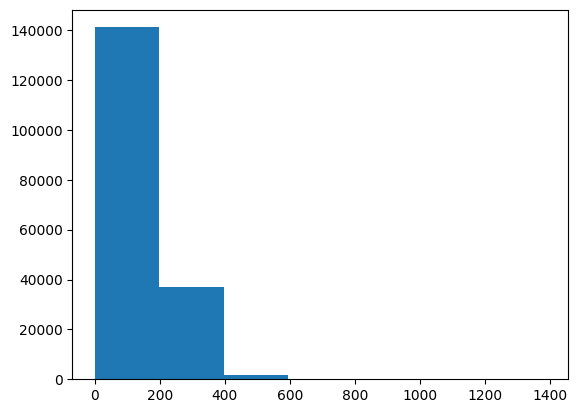

In [ ]:
# Check the distribution of our sequences at character-level
import matplotlib.pyplot as plt
plt.hist(char_lens, bins=7);

In [ ]:
# Find what character length covers 95% of sequences
output_seq_char_len = int(np.percentile(char_lens, 95))
output_seq_char_len

290

In [ ]:
# Get all keyboard characters for char-level embedding
import string
alphabet = string.ascii_lowercase + string.digits + string.punctuation
alphabet


'abcdefghijklmnopqrstuvwxyz0123456789!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [ ]:
# Create char-level token vectorizer instance
NUM_CHAR_TOKENS = len(alphabet) + 2 # num characters in alphabet + space + OOV token
char_vectorizer = TextVectorization(max_tokens=NUM_CHAR_TOKENS,
                                    output_sequence_length=output_seq_char_len,
                                    standardize="lower_and_strip_punctuation",
                                    name="char_vectorizer")

# Adapt character vectorizer to training characters
char_vectorizer.adapt(train_chars)

In [ ]:
# Check character vocabulary characteristics
char_vocab = char_vectorizer.get_vocabulary()
print(f"Number of different characters in character vocab: {len(char_vocab)}")
print(f"5 most common characters: {char_vocab[:5]}")
print(f"5 least common characters: {char_vocab[-5:]}")

Number of different characters in character vocab: 28
5 most common characters: ['', '[UNK]', 'e', 't', 'i']
5 least common characters: ['k', 'x', 'z', 'q', 'j']


In [ ]:
# Test out character vectorizer
random_train_chars = random.choice(train_chars)
print(f"Charified text:\n{random_train_chars}")
print(f"\nLength of chars: {len(random_train_chars.split())}")
vectorized_chars = char_vectorizer([random_train_chars])
print(f"\nVectorized chars:\n{vectorized_chars}")
print(f"\nLength of vectorized chars: {len(vectorized_chars[0])}")

Charified text:
C r o s s - s e c t i o n a l   a n a l y s e s   r e v e a l e d   s t a t i s t i c a l l y   s i g n i f i c a n t   r e l a t i o n s h i p s   b e t w e e n   T L F I   a n d   l i v e r   m e a n   P D F F   (   R   @   =   @   b a s e l i n e / @   @   f o l l o w - u p   ,   P   <   @   b a s e l i n e / P   <   @   f o l l o w - u p   )   ,   a n d   b e t w e e n   T L F I   a n d   l i v e r   v o l u m e   (   R   @   =   @   /   @   ,   P   <   @   /   <   @   )   .

Length of chars: 191

Vectorized chars:
[[11  8  7  9  9  9  2 11  3  4  7  6  5 12  5  6  5 12 19  9  2  9  8  2
  21  2  5 12  2 10  9  3  5  3  4  9  3  4 11  5 12 12 19  9  4 18  6  4
  17  4 11  5  6  3  8  2 12  5  3  4  7  6  9 13  4 14  9 22  2  3 20  2
   2  6  3 12 17  4  5  6 10 12  4 21  2  8 15  2  5  6 14 10 17 17  8 22
   5  9  2 12  4  6  2 17  7 12 12  7 20 16 14 14 22  5  9  2 12  4  6  2
  14 17  7 12 12  7 20 16 14  5  6 10 22  2  3 20  2  2  6  3 12 17  4  5
   6 10 12  4 2

### Creating a character-level embedding

In [ ]:
# Create char embedding layer
char_embed = layers.Embedding(input_dim=NUM_CHAR_TOKENS, # number of different characters
                              output_dim=25, # embedding dimension of each character (same as Figure 1 in https://arxiv.org/pdf/1612.05251.pdf)
                              mask_zero=False, # don't use masks (this messes up model_5 if set to True)
                              name="char_embed")

# Test out character embedding layer
print(f"Charified text (before vectorization and embedding):\n{random_train_chars}\n")
char_embed_example = char_embed(char_vectorizer([random_train_chars]))
print(f"Embedded chars (after vectorization and embedding):\n{char_embed_example}\n")
print(f"Character embedding shape: {char_embed_example.shape}")

Charified text (before vectorization and embedding):
C r o s s - s e c t i o n a l   a n a l y s e s   r e v e a l e d   s t a t i s t i c a l l y   s i g n i f i c a n t   r e l a t i o n s h i p s   b e t w e e n   T L F I   a n d   l i v e r   m e a n   P D F F   (   R   @   =   @   b a s e l i n e / @   @   f o l l o w - u p   ,   P   <   @   b a s e l i n e / P   <   @   f o l l o w - u p   )   ,   a n d   b e t w e e n   T L F I   a n d   l i v e r   v o l u m e   (   R   @   =   @   /   @   ,   P   <   @   /   <   @   )   .

Embedded chars (after vectorization and embedding):
[[[ 0.00360904  0.01742432 -0.016854   ...  0.02068535  0.0340997
    0.01639042]
  [-0.01028182  0.02638273  0.04639032 ...  0.03742639 -0.0157987
    0.02640634]
  [-0.04725237 -0.01187696  0.0151217  ...  0.02482536 -0.02837057
   -0.0169255 ]
  ...
  [ 0.04858502  0.03075976  0.0296204  ...  0.04849098 -0.0168859
    0.01692886]
  [ 0.04858502  0.03075976  0.0296204  ...  0.04849098 -0.0168859
    0.016

### Building a Conv1D model to fit on character embeddings

he model will have the same structure as our custom token embedding model (model_1) except it'll take character-level sequences as input instead of token-level sequences.

1. Input (character-level text)
2. Tokenize
3. Embedding
4. Layers (Conv1D, GlobalMaxPool1D)
5. Output (label probability)

In [ ]:

# Make Conv1D on chars only
inputs = layers.Input(shape=(1,), dtype="string")
char_vectors = char_vectorizer(inputs)
char_embeddings = char_embed(char_vectors)
x = layers.Conv1D(64, kernel_size=5, padding="same", activation="relu")(char_embeddings)
x = layers.GlobalMaxPool1D()(x)
outputs = layers.Dense(num_classes, activation="softmax")(x)
model_3 = tf.keras.Model(inputs=inputs,
                         outputs=outputs,
                         name="model_3_conv1D_char_embedding")

# Compile model
model_3.compile(loss="categorical_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])


In [ ]:
# Check the summary of conv1d_char_model
model_3.summary()

Model: "model_3_conv1D_char_embedding"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 1)]               0         
                                                                 
 char_vectorizer (TextVecto  (None, 290)               0         
 rization)                                                       
                                                                 
 char_embed (Embedding)      (None, 290, 25)           1750      
                                                                 
 conv1d_1 (Conv1D)           (None, 290, 64)           8064      
                                                                 
 global_max_pooling1d (Glob  (None, 64)                0         
 alMaxPooling1D)                                                 
                                                                 
 dense_3 (Dense)             (None, 5

In [ ]:
# Create char datasets
train_char_dataset = tf.data.Dataset.from_tensor_slices((train_chars, train_labels_one_hot)).batch(32).prefetch(tf.data.AUTOTUNE)
val_char_dataset = tf.data.Dataset.from_tensor_slices((val_chars, val_labels_one_hot)).batch(32).prefetch(tf.data.AUTOTUNE)

train_char_dataset

<_PrefetchDataset element_spec=(TensorSpec(shape=(None,), dtype=tf.string, name=None), TensorSpec(shape=(None, 5), dtype=tf.float64, name=None))>

In [ ]:
# Fit the model on chars only
model_3_history = model_3.fit(train_char_dataset,
                              steps_per_epoch=int(0.1 * len(train_char_dataset)),
                              epochs=3,
                              validation_data=val_char_dataset,
                              validation_steps=int(0.1 * len(val_char_dataset)))


Epoch 1/3
562/562 [==============================] - 5s 8ms/step - loss: 1.2525 - accuracy: 0.4938 - val_loss: 1.0306 - val_accuracy: 0.5844
Epoch 2/3
562/562 [==============================] - 3s 5ms/step - loss: 1.0036 - accuracy: 0.5938 - val_loss: 0.9450 - val_accuracy: 0.6154
Epoch 3/3
562/562 [==============================] - 3s 5ms/step - loss: 0.9358 - accuracy: 0.6272 - val_loss: 0.8735 - val_accuracy: 0.6596


In [ ]:
# Evaluate model_3 on whole validation char dataset
model_3.evaluate(val_char_dataset)

945/945 [==============================] - 4s 4ms/step - loss: 0.8949 - accuracy: 0.6499


[0.8948878049850464, 0.6499404311180115]

In [ ]:

# Make predictions with character model only
model_3_pred_probs = model_3.predict(val_char_dataset)
model_3_pred_probs

945/945 [==============================] - 3s 3ms/step


array([[0.12893255, 0.38477713, 0.16432662, 0.24390048, 0.0780632 ],
       [0.2319252 , 0.47621056, 0.04761543, 0.2012    , 0.04304871],
       [0.11558887, 0.25939283, 0.22219916, 0.29095528, 0.11186387],
       ...,
       [0.01860553, 0.04190346, 0.0581957 , 0.03664226, 0.84465307],
       [0.04767694, 0.12407617, 0.18504041, 0.02466482, 0.61854166],
       [0.59297234, 0.25371054, 0.07033373, 0.07355659, 0.00942681]],
      dtype=float32)

In [ ]:
# Convert predictions to classes
model_3_preds = tf.argmax(model_3_pred_probs, axis=1)
model_3_preds

<tf.Tensor: shape=(30212,), dtype=int64, numpy=array([1, 1, 3, ..., 4, 4, 0])>

In [ ]:
# Calculate Conv1D char only model results
model_3_results = calculate_results(y_true=val_labels_encoded,
                                        y_pred=model_3_preds)
model_3_results

{'accuracy': 64.99404210247583,
 'precision': 0.6434651238652656,
 'recall': 0.6499404210247584,
 'f1': 0.6397634289858013}

## Model 4: Combining pretrained token embeddings + character embeddings (hybrid embedding layer)

To start replicating (or getting close to replicating) the model in Figure 1, we're going to go through the following steps:

1. Create a token-level model (similar to model_1)
2. Create a character-level model (similar to model_3 with a slight modification to reflect the paper)
3. Combine (using layers.Concatenate) the outputs of 1 and 2
4. Build a series of output layers on top of 3 similar to Figure 1 and section 4.2 of [*Neural Networks for Joint Sentence Classification]

In [ ]:
# 1. Setup token inputs/model
token_inputs = layers.Input(shape=[], dtype=tf.string, name="token_input")
token_embeddings = tf_hub_embedding_layer(token_inputs)
token_output = layers.Dense(128, activation="relu")(token_embeddings)
token_model = tf.keras.Model(inputs=token_inputs,
                             outputs=token_output)

# 2. Setup char inputs/model
char_inputs = layers.Input(shape=(1,), dtype=tf.string, name="char_input")
char_vectors = char_vectorizer(char_inputs)
char_embeddings = char_embed(char_vectors)
char_bi_lstm = layers.Bidirectional(layers.LSTM(25))(char_embeddings) # bi-LSTM shown in Figure 1 of https://arxiv.org/pdf/1612.05251.pdf
char_model = tf.keras.Model(inputs=char_inputs,
                            outputs=char_bi_lstm)

# 3. Concatenate token and char inputs (create hybrid token embedding)
token_char_concat = layers.Concatenate(name="token_char_hybrid")([token_model.output,
                                                                  char_model.output])

# 4. Create output layers - addition of dropout discussed in 4.2 of https://arxiv.org/pdf/1612.05251.pdf
combined_dropout = layers.Dropout(0.5)(token_char_concat)
combined_dense = layers.Dense(200, activation="relu")(combined_dropout) # slightly different to Figure 1 due to different shapes of token/char embedding layers
final_dropout = layers.Dropout(0.5)(combined_dense)
output_layer = layers.Dense(num_classes, activation="softmax")(final_dropout)

# 5. Construct model with char and token inputs
model_4 = tf.keras.Model(inputs=[token_model.input, char_model.input],
                         outputs=output_layer,
                         name="model_4_token_and_char_embeddings")

In [ ]:
# Get summary of token and character model
model_4.summary()

Model: "model_4_token_and_char_embeddings"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 char_input (InputLayer)     [(None, 1)]                  0         []                            
                                                                                                  
 token_input (InputLayer)    [(None,)]                    0         []                            
                                                                                                  
 char_vectorizer (TextVecto  (None, 290)                  0         ['char_input[0][0]']          
 rization)                                                                                        
                                                                                                  
 universal_sentence_encoder  (None, 512)                  2567978 

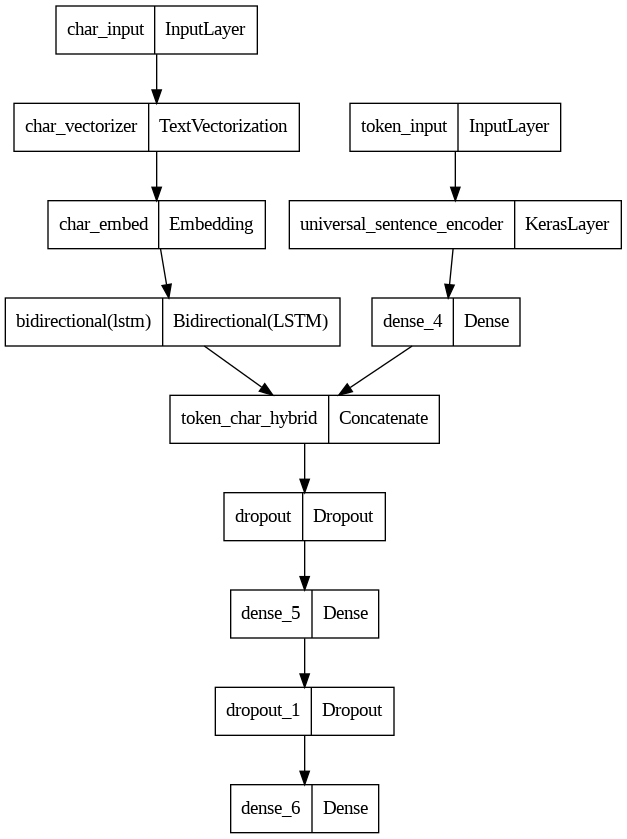

In [ ]:
# Plot hybrid token and character model
from tensorflow.keras.utils import plot_model
plot_model(model_4)

In [ ]:
# Compile token char model
model_4.compile(loss="categorical_crossentropy",
                optimizer=tf.keras.optimizers.Adam(), # section 4.2 of https://arxiv.org/pdf/1612.05251.pdf mentions using SGD but we'll stick with Adam
                metrics=["accuracy"])

In [ ]:
# Combine chars and tokens into a dataset
train_char_token_data = tf.data.Dataset.from_tensor_slices((train_sentences, train_chars)) # make data
train_char_token_labels = tf.data.Dataset.from_tensor_slices(train_labels_one_hot) # make labels
train_char_token_dataset = tf.data.Dataset.zip((train_char_token_data, train_char_token_labels)) # combine data and labels

# Prefetch and batch train data
train_char_token_dataset = train_char_token_dataset.batch(32).prefetch(tf.data.AUTOTUNE)

# Repeat same steps validation data
val_char_token_data = tf.data.Dataset.from_tensor_slices((val_sentences, val_chars))
val_char_token_labels = tf.data.Dataset.from_tensor_slices(val_labels_one_hot)
val_char_token_dataset = tf.data.Dataset.zip((val_char_token_data, val_char_token_labels))
val_char_token_dataset = val_char_token_dataset.batch(32).prefetch(tf.data.AUTOTUNE)


In [ ]:
# Check out training char and token embedding dataset
train_char_token_dataset, val_char_token_dataset

(<_PrefetchDataset element_spec=((TensorSpec(shape=(None,), dtype=tf.string, name=None), TensorSpec(shape=(None,), dtype=tf.string, name=None)), TensorSpec(shape=(None, 5), dtype=tf.float64, name=None))>,
 <_PrefetchDataset element_spec=((TensorSpec(shape=(None,), dtype=tf.string, name=None), TensorSpec(shape=(None,), dtype=tf.string, name=None)), TensorSpec(shape=(None, 5), dtype=tf.float64, name=None))>)

In [ ]:
# Fit the model on tokens and chars
model_4_history = model_4.fit(train_char_token_dataset, # train on dataset of token and characters
                              steps_per_epoch=int(0.1 * len(train_char_token_dataset)),
                              epochs=3,
                              validation_data=val_char_token_dataset,
                              validation_steps=int(0.1 * len(val_char_token_dataset)))

Epoch 1/3
562/562 [==============================] - 27s 34ms/step - loss: 0.9779 - accuracy: 0.6123 - val_loss: 0.7765 - val_accuracy: 0.7018
Epoch 2/3
562/562 [==============================] - 18s 33ms/step - loss: 0.7897 - accuracy: 0.6960 - val_loss: 0.7160 - val_accuracy: 0.7294
Epoch 3/3
562/562 [==============================] - 17s 31ms/step - loss: 0.7652 - accuracy: 0.7073 - val_loss: 0.6822 - val_accuracy: 0.7440


In [ ]:
# Evaluate on the whole validation dataset
model_4.evaluate(val_char_token_dataset)

945/945 [==============================] - 18s 19ms/step - loss: 0.6878 - accuracy: 0.7377


[0.6877625584602356, 0.7376869916915894]

In [ ]:
# Make predictions using the token-character model hybrid
model_4_pred_probs = model_4.predict(val_char_token_dataset)
model_4_pred_probs

945/945 [==============================] - 18s 17ms/step


array([[5.00894964e-01, 2.57091850e-01, 3.58703732e-03, 2.31770709e-01,
        6.65544532e-03],
       [3.65345091e-01, 4.27097619e-01, 3.26113123e-03, 2.02766508e-01,
        1.52966368e-03],
       [3.39633703e-01, 9.90655646e-02, 3.83641943e-02, 5.01640320e-01,
        2.12961622e-02],
       ...,
       [4.74362721e-04, 1.12912515e-02, 5.72916903e-02, 2.15824824e-04,
        9.30726886e-01],
       [7.42579764e-03, 6.56626076e-02, 2.19444096e-01, 4.41376632e-03,
        7.03053713e-01],
       [2.90252358e-01, 4.12479550e-01, 2.33894423e-01, 2.64405645e-02,
        3.69331576e-02]], dtype=float32)

In [ ]:
# Turn prediction probabilities into prediction classes
model_4_preds = tf.argmax(model_4_pred_probs, axis=1)
model_4_preds

<tf.Tensor: shape=(30212,), dtype=int64, numpy=array([0, 1, 3, ..., 4, 4, 1])>

In [ ]:
# Get results of token-char-hybrid model
model_4_results = calculate_results(y_true=val_labels_encoded,
                                    y_pred=model_4_preds)
model_4_results

{'accuracy': 73.76870117833974,
 'precision': 0.7372349819902213,
 'recall': 0.7376870117833974,
 'f1': 0.7351969075054302}

## Model 5: Transfer Learning with pretrained token embeddings + character embeddings + positional embeddings

Abstracts typically come in a sequential order, such as:

OBJECTIVE ...METHODS ...METHODS ...METHODS ...RESULTS ...CONCLUSIONS

-- Or --

BACKGROUND ...OBJECTIVE ...METHODS ...METHODS ...RESULTS ...RESULTS ...CONCLUSIONS ...CONCLUSIONS ...

We can encode the order of a set of sequences in an abstract. For example,

Sentence 1 of 10 ...

Sentence 2 of 10 ...

Sentence 3 of 10 ...

Sentence 4 of 10 ...

In [ ]:
# Inspect training dataframe
train_df.head()

,line_number,target,text,total_lines
0,0,OBJECTIVE,To investigate the efficacy of @ weeks of dail...,11
1,1,METHODS,A total of @ patients with primary knee OA wer...,11
2,2,METHODS,Outcome measures included pain reduction and i...,11
3,3,METHODS,Pain was assessed using the visual analog pain...,11
4,4,METHODS,Secondary outcome measures included the Wester...,11


In [ ]:
train_df["Sentence_position_in_abstrack"] = train_df["line_number"]/train_df["total_lines"]
train_df[:20]

,line_number,target,text,total_lines,Sentence_position_in_abstrack
0,0,OBJECTIVE,To investigate the efficacy of @ weeks of dail...,11,0.000000
1,1,METHODS,A total of @ patients with primary knee OA wer...,11,0.090909
2,2,METHODS,Outcome measures included pain reduction and i...,11,0.181818
3,3,METHODS,Pain was assessed using the visual analog pain...,11,0.272727
4,4,METHODS,Secondary outcome measures included the Wester...,11,0.363636
5,5,METHODS,"Serum levels of interleukin @ ( IL-@ ) , IL-@ ...",11,0.454545
6,6,RESULTS,There was a clinically relevant reduction in t...,11,0.545455
7,7,RESULTS,The mean difference between treatment arms ( @...,11,0.636364
8,8,RESULTS,"Further , there was a clinically relevant redu...",11,0.727273
9,9,RESULTS,These differences remained significant at @ we...,11,0.818182


In [ ]:
# How many different line numbers are there?
train_df["line_number"].value_counts()

0     15000
1     15000
2     15000
3     15000
4     14992
5     14949
6     14758
7     14279
8     13346
9     11981
10    10041
11     7892
12     5853
13     4152
14     2835
15     1861
16     1188
17      751
18      462
19      286
20      162
21      101
22       66
23       33
24       22
25       14
26        7
27        4
28        3
29        1
30        1
Name: line_number, dtype: int64

<Axes: ylabel='Frequency'>

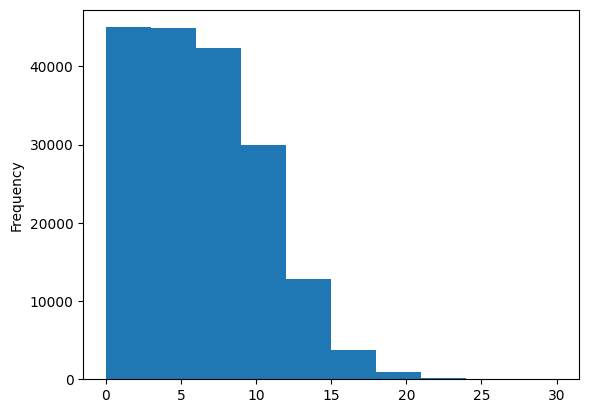

In [ ]:
# Check the distribution of "line_number" column
train_df.line_number.plot.hist()

In [ ]:
# Use TensorFlow to create one-hot-encoded tensors of our "line_number" column
train_line_numbers_one_hot = tf.one_hot(train_df["line_number"].to_numpy(), depth=15)
val_line_numbers_one_hot = tf.one_hot(val_df["line_number"].to_numpy(), depth=15)
test_line_numbers_one_hot = tf.one_hot(test_df["line_number"].to_numpy(), depth=15)

In [ ]:
# Check one-hot encoded "line_number" feature samples
train_line_numbers_one_hot.shape, train_line_numbers_one_hot[:20]

(TensorShape([180040, 15]),
 <tf.Tensor: shape=(20, 15), dtype=float32, numpy=
 array([[1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
        [1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0.

In [ ]:
# How many different numbers of lines are there?
train_df["total_lines"].value_counts()

11    24468
10    23639
12    22113
9     19400
13    18438
14    14610
8     12285
15    10768
7      7464
16     7429
17     5202
6      3353
18     3344
19     2480
20     1281
5      1146
21      770
22      759
23      264
4       215
24      200
25      182
26       81
28       58
3        32
30       31
27       28
Name: total_lines, dtype: int64

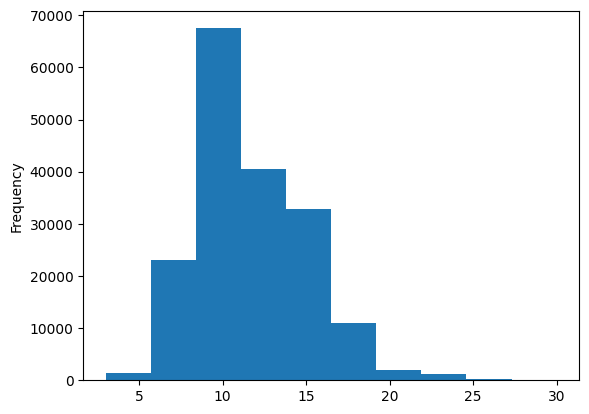

In [ ]:
# Check the distribution of total lines
train_df.total_lines.plot.hist();


In [ ]:
# Check the coverage of a "total_lines" value of 20
np.percentile(train_df.total_lines, 98) # a value of 20 covers 98% of samples

20.0

In [ ]:
# Use TensorFlow to create one-hot-encoded tensors of our "total_lines" column
train_total_lines_one_hot = tf.one_hot(train_df["total_lines"].to_numpy(), depth=20)
val_total_lines_one_hot = tf.one_hot(val_df["total_lines"].to_numpy(), depth=20)
test_total_lines_one_hot = tf.one_hot(test_df["total_lines"].to_numpy(), depth=20)

# Check shape and samples of total lines one-hot tensor
train_total_lines_one_hot.shape, train_total_lines_one_hot[:10]


(TensorShape([180040, 20]),
 <tf.Tensor: shape=(10, 20), dtype=float32, numpy=
 array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
         0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
         0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
         0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
         0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
         0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
         0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
         0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
         0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
         0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0

### Building a tribrid embeding model
1. Create a token-level model
2. Create a character-level model
3. Create a model for the "line_numeber" feature
4. Create a model for the "total_lines" feature
5. Combine the outputs of 1 & 2 using tf.keras.layers.Concatenate
6. Combine the ouputs of 3, 4, 5 using tf.keras.layers.Concatenate
7. Create an output layer to accept the tribred embedding and output label propabilities
8. Combine the inputs 1, 2, 3, 4 and aouputs of into a tf.keras.Model

In [ ]:
# 1. Token inputs
token_inputs = layers.Input(shape=[], dtype="string", name="token_inputs")
token_embeddings = tf_hub_embedding_layer(token_inputs)
token_outputs = layers.Dense(128, activation="relu")(token_embeddings)
token_model = tf.keras.Model(inputs=token_inputs,
                             outputs=token_outputs)


# 2. Char inputs
char_inputs = layers.Input(shape=(1, ), dtype="string", name="char_inputs")
char_vectors = char_vectorizer(char_inputs)
char_embeddings = char_embed(char_vectors)
char_bi_lstm = layers.Bidirectional(layers.LSTM(24))(char_embeddings)
char_model = tf.keras.Model(inputs=char_inputs,
                            outputs=char_bi_lstm)


# 3. Line numbers inputs
line_number_inputs = layers.Input(shape=(15,), dtype=tf.int32, name="line_number_input")
x = layers.Dense(32, activation="relu")(line_number_inputs)
line_number_model = tf.keras.Model(inputs=line_number_inputs,
                                   outputs=x)


# 4. Total lines inputs
total_lines_inputs = layers.Input(shape=(20,), dtype=tf.int32, name="total_lines_input")
y = layers.Dense(32, activation="relu")(total_lines_inputs)
total_line_model = tf.keras.Model(inputs=total_lines_inputs,
                                  outputs=y)


# 5. Combine token and char embeddings into a hybrid embedding
combined_embeddings = layers.Concatenate(name="token_char_hybrid_embedding")([token_model.output,
                                                                              char_model.output])
z = layers.Dense(256, activation="relu")(combined_embeddings)
z = layers.Dropout(0.5)(z)


# 6. Combine positional embeddings with combined token and char embeddings into a tribrid embedding
z = layers.Concatenate(name="token_char_positional_embedding")([line_number_model.output,
                                                                total_line_model.output,
                                                                z])


# 7. Create output layer
output_layer = layers.Dense(5, activation="softmax", name="output_layer")(z)


# 8. Put together model
model_5 = tf.keras.Model(inputs=[line_number_model.input,
                                 total_line_model.input,
                                 token_model.input,
                                 char_model.input],
                         outputs=output_layer,
                         name="tribrid_embedding_model")

In [ ]:
# Get a summary of our token, char and positional embedding model
model_5.summary()

Model: "tribrid_embedding_model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 char_inputs (InputLayer)    [(None, 1)]                  0         []                            
                                                                                                  
 token_inputs (InputLayer)   [(None,)]                    0         []                            
                                                                                                  
 char_vectorizer (TextVecto  (None, 290)                  0         ['char_inputs[0][0]']         
 rization)                                                                                        
                                                                                                  
 universal_sentence_encoder  (None, 512)                  2567978   ['token_

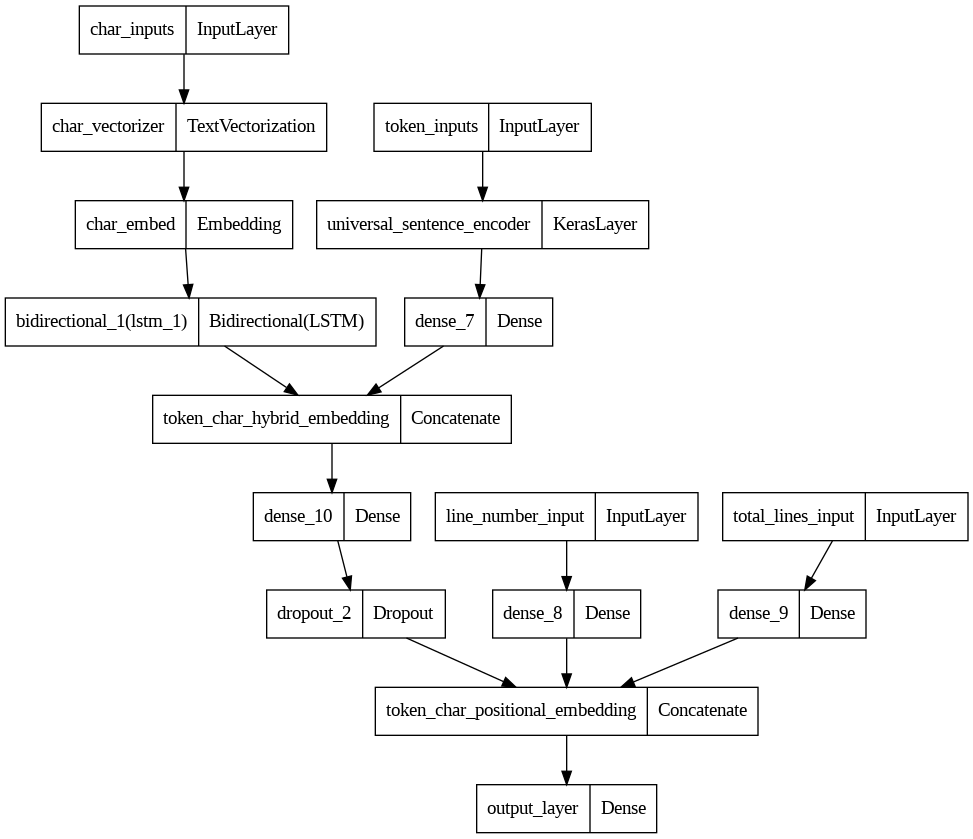

In [ ]:
# Plot the token, char, positional embedding model
from tensorflow.keras.utils import plot_model
plot_model(model_5)

In [ ]:
# Check which layers of our model are trainable or not
for layer in model_5.layers:
  print(layer, layer.trainable)


<keras.src.engine.input_layer.InputLayer object at 0x7a04efdd3490> True
<keras.src.engine.input_layer.InputLayer object at 0x7a04efdd27a0> True
<keras.src.layers.preprocessing.text_vectorization.TextVectorization object at 0x7a04f84ca080> True
<tensorflow_hub.keras_layer.KerasLayer object at 0x7a04fa9fe2f0> False
<keras.src.layers.core.embedding.Embedding object at 0x7a04fb68aaa0> True
<keras.src.layers.core.dense.Dense object at 0x7a04efdd27d0> True
<keras.src.layers.rnn.bidirectional.Bidirectional object at 0x7a04efda4ca0> True
<keras.src.layers.merging.concatenate.Concatenate object at 0x7a04efda66e0> True
<keras.src.engine.input_layer.InputLayer object at 0x7a04efeb41f0> True
<keras.src.engine.input_layer.InputLayer object at 0x7a04efda50c0> True
<keras.src.layers.core.dense.Dense object at 0x7a04efcf6230> True
<keras.src.layers.core.dense.Dense object at 0x7a04efe25f00> True
<keras.src.layers.core.dense.Dense object at 0x7a04efd81de0> True
<keras.src.layers.regularization.dropout.

In [ ]:
# Compile token, char, positional embedding model
model_5.compile(loss=tf.keras.losses.CategoricalCrossentropy(label_smoothing=0.2), # add label smoothing (examples which are really confident get smoothed a little)
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])


### Create tribrid embedding datasets and fit tribrid model

In [ ]:
# Create training and validation datasets (all four kinds of inputs)
train_pos_char_token_data = tf.data.Dataset.from_tensor_slices((train_line_numbers_one_hot, # line numbers
                                                                train_total_lines_one_hot, # total lines
                                                                train_sentences, # train tokens
                                                                train_chars)) # train chars
train_pos_char_token_labels = tf.data.Dataset.from_tensor_slices(train_labels_one_hot) # train labels
train_pos_char_token_dataset = tf.data.Dataset.zip((train_pos_char_token_data, train_pos_char_token_labels)) # combine data and labels
train_pos_char_token_dataset = train_pos_char_token_dataset.batch(32).prefetch(tf.data.AUTOTUNE) # turn into batches and prefetch appropriately

# Validation dataset
val_pos_char_token_data = tf.data.Dataset.from_tensor_slices((val_line_numbers_one_hot,
                                                              val_total_lines_one_hot,
                                                              val_sentences,
                                                              val_chars))
val_pos_char_token_labels = tf.data.Dataset.from_tensor_slices(val_labels_one_hot)
val_pos_char_token_dataset = tf.data.Dataset.zip((val_pos_char_token_data, val_pos_char_token_labels))
val_pos_char_token_dataset = val_pos_char_token_dataset.batch(32).prefetch(tf.data.AUTOTUNE) # turn into batches and prefetch appropriately

# Check input shapes
train_pos_char_token_dataset, val_pos_char_token_dataset

(<_PrefetchDataset element_spec=((TensorSpec(shape=(None, 15), dtype=tf.float32, name=None), TensorSpec(shape=(None, 20), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.string, name=None), TensorSpec(shape=(None,), dtype=tf.string, name=None)), TensorSpec(shape=(None, 5), dtype=tf.float64, name=None))>,
 <_PrefetchDataset element_spec=((TensorSpec(shape=(None, 15), dtype=tf.float32, name=None), TensorSpec(shape=(None, 20), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.string, name=None), TensorSpec(shape=(None,), dtype=tf.string, name=None)), TensorSpec(shape=(None, 5), dtype=tf.float64, name=None))>)

In [ ]:
# Fit the token, char and positional embedding model
history_model_5 = model_5.fit(train_pos_char_token_dataset,
                              steps_per_epoch=int(0.1 * len(train_pos_char_token_dataset)),
                              epochs=3,
                              validation_data=val_pos_char_token_dataset,
                              validation_steps=int(0.1 * len(val_pos_char_token_dataset)))


Epoch 1/3
562/562 [==============================] - 26s 35ms/step - loss: 1.0965 - accuracy: 0.7236 - val_loss: 0.9849 - val_accuracy: 0.7999
Epoch 2/3
562/562 [==============================] - 19s 33ms/step - loss: 0.9670 - accuracy: 0.8138 - val_loss: 0.9499 - val_accuracy: 0.8258
Epoch 3/3
562/562 [==============================] - 18s 32ms/step - loss: 0.9501 - accuracy: 0.8228 - val_loss: 0.9396 - val_accuracy: 0.8324


In [ ]:
# Make predictions with token-char-positional hybrid model
model_5_pred_probs = model_5.predict(val_pos_char_token_dataset, verbose=1)
model_5_pred_probs

945/945 [==============================] - 18s 17ms/step


array([[0.49957234, 0.1071626 , 0.01253163, 0.35510573, 0.02562773],
       [0.5279519 , 0.0844863 , 0.04120916, 0.3349012 , 0.0114514 ],
       [0.26902017, 0.10466733, 0.11957352, 0.44327673, 0.06346216],
       ...,
       [0.03181852, 0.09327416, 0.03496714, 0.02942239, 0.8105178 ],
       [0.03339051, 0.31793687, 0.07491611, 0.02834144, 0.5454151 ],
       [0.2734762 , 0.53526473, 0.07174802, 0.04151946, 0.07799161]],
      dtype=float32)

In [ ]:
# Turn prediction probabilities into prediction classes
model_5_preds = tf.argmax(model_5_pred_probs, axis=1)
model_5_preds

<tf.Tensor: shape=(30212,), dtype=int64, numpy=array([0, 0, 3, ..., 4, 4, 1])>

In [ ]:
# Calculate results of token-char-positional hybrid model
model_5_results = calculate_results(y_true=val_labels_encoded,
                                    y_pred=model_5_preds)
model_5_results

{'accuracy': 83.13253012048193,
 'precision': 0.8303525148837235,
 'recall': 0.8313253012048193,
 'f1': 0.8304234399189969}

### Compare model results

In [ ]:
# Combine model results into a DataFrame
all_model_results = pd.DataFrame({"baseline": baseline_results,
                                  "custom_token_embed_conv1d": model_1_results,
                                  "pretrained_token_embed": model_2_results,
                                  "custom_char_embed_conv1d": model_3_results,
                                  "hybrid_char_token_embed": model_4_results,
                                  "tribrid_pos_char_token_embed": model_5_results})
all_model_results = all_model_results.transpose()
all_model_results

,accuracy,precision,recall,f1
baseline,72.183238,0.718647,0.721832,0.698925
custom_token_embed_conv1d,78.561499,0.782388,0.785615,0.783002
pretrained_token_embed,71.402092,0.714182,0.714021,0.711134
custom_char_embed_conv1d,64.994042,0.643465,0.649940,0.639763
hybrid_char_token_embed,73.768701,0.737235,0.737687,0.735197
tribrid_pos_char_token_embed,83.132530,0.830353,0.831325,0.830423


In [ ]:
# Reduce the accuracy to same scale as other metrics
all_model_results["accuracy"] = all_model_results["accuracy"]/100

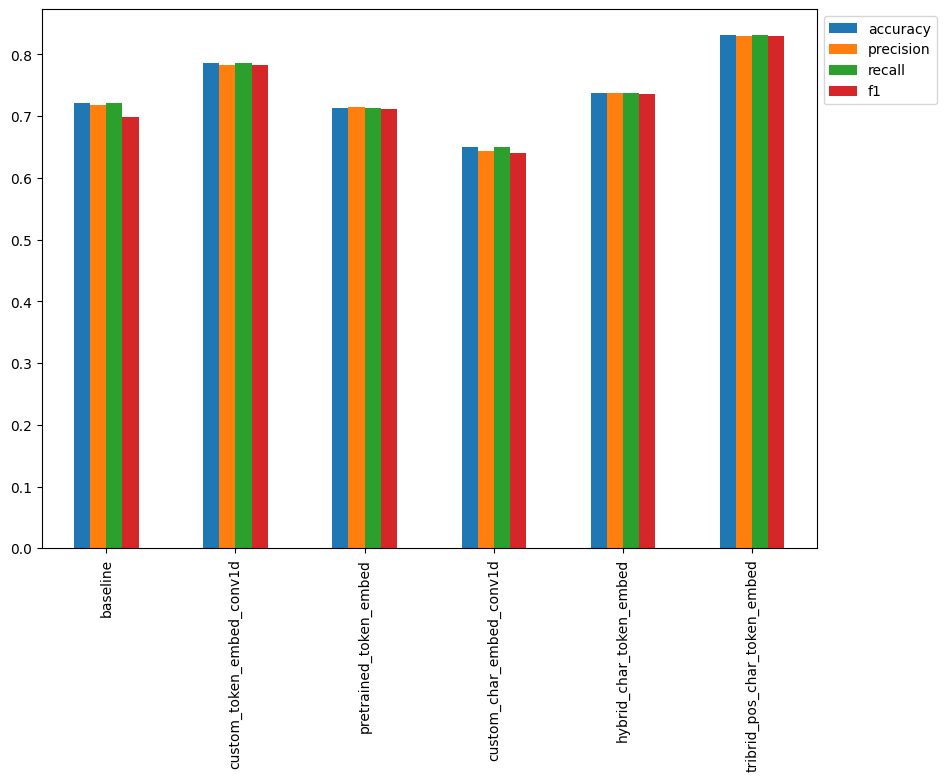

In [ ]:
# Plot and compare all of the model results
all_model_results.plot(kind="bar", figsize=(10, 7)).legend(bbox_to_anchor=(1.0, 1.0));

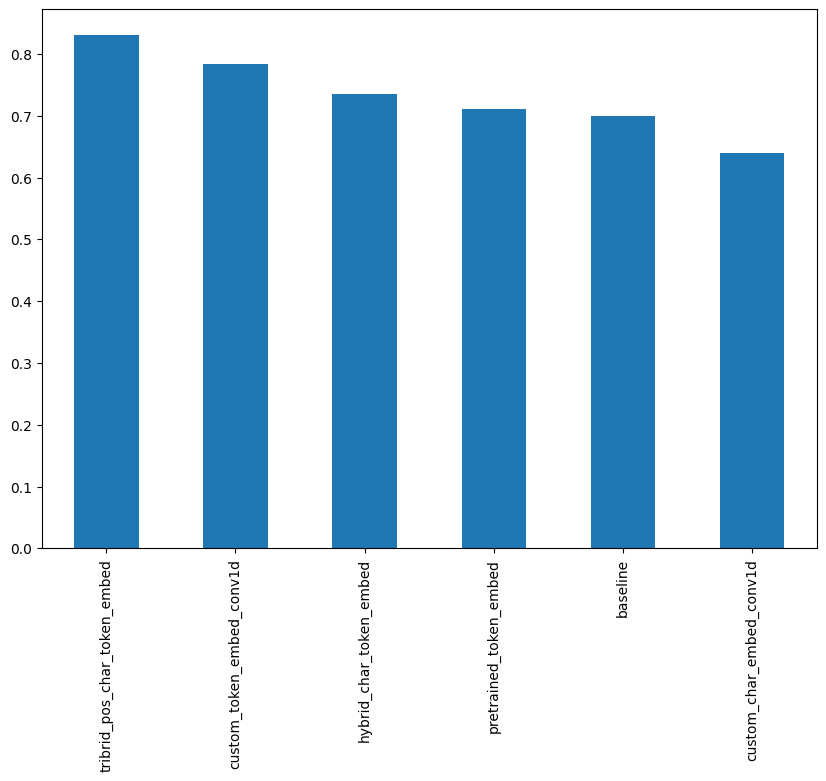

In [ ]:
# Sort model results by f1-score
all_model_results.sort_values("f1", ascending=False)["f1"].plot(kind="bar", figsize=(10, 7));

### Save and load best performing model

In [ ]:
# Save best performing model to SavedModel format (default)
model_5.save("skimlit_tribrid_model") # model will be saved to path specified by string

This will save the model in the colab files in a zip file with name: skimlit_tribrid_model.zip

Now we can download the zip file.

To use the model we can upload it then in the colab or in the file if we are working on jupiter notebook

```
# !wget ... (the link that we save the model in the zip file)
!mkdir skimlit_model
!unzip skimlit_tribrid_model.zip -d skimlit_model

model_path = "skimlit_model/skimlit_tribrid_model/"

# Load the model
loaded_model = tf.keras.models.load_model(model_path)
```

### Find most wrong

In [ ]:
%%time
# Get list of class names of test predictions
test_pred_classes = [label_encoder.classes_[pred] for pred in test_preds]
test_pred_classes

CPU times: user 14.5 s, sys: 758 ms, total: 15.3 s
Wall time: 14.6 s


['OBJECTIVE',
 'OBJECTIVE',
 'METHODS',
 'METHODS',
 'RESULTS',
 'RESULTS',
 'RESULTS',
 'CONCLUSIONS',
 'CONCLUSIONS',
 'BACKGROUND',
 'BACKGROUND',
 'METHODS',
 'METHODS',
 'METHODS',
 'RESULTS',
 'RESULTS',
 'RESULTS',
 'RESULTS',
 'RESULTS',
 'RESULTS',
 'CONCLUSIONS',
 'CONCLUSIONS',
 'OBJECTIVE',
 'OBJECTIVE',
 'METHODS',
 'METHODS',
 'RESULTS',
 'RESULTS',
 'RESULTS',
 'CONCLUSIONS',
 'CONCLUSIONS',
 'BACKGROUND',
 'METHODS',
 'BACKGROUND',
 'METHODS',
 'METHODS',
 'METHODS',
 'METHODS',
 'RESULTS',
 'RESULTS',
 'RESULTS',
 'RESULTS',
 'CONCLUSIONS',
 'CONCLUSIONS',
 'BACKGROUND',
 'BACKGROUND',
 'BACKGROUND',
 'OBJECTIVE',
 'METHODS',
 'METHODS',
 'METHODS',
 'METHODS',
 'METHODS',
 'METHODS',
 'RESULTS',
 'RESULTS',
 'CONCLUSIONS',
 'CONCLUSIONS',
 'OBJECTIVE',
 'METHODS',
 'METHODS',
 'METHODS',
 'METHODS',
 'METHODS',
 'RESULTS',
 'RESULTS',
 'RESULTS',
 'METHODS',
 'CONCLUSIONS',
 'OBJECTIVE',
 'METHODS',
 'METHODS',
 'METHODS',
 'RESULTS',
 'METHODS',
 'RESULTS',
 'RESULTS

In [ ]:
# Create prediction-enriched test dataframe
test_df["prediction"] = test_pred_classes # create column with test prediction class names
test_df["pred_prob"] = tf.reduce_max(test_pred_probs, axis=1).numpy() # get the maximum prediction probability
test_df["correct"] = test_df["prediction"] == test_df["target"] # create binary column for whether the prediction is right or not
test_df.head(20)

,line_number,target,text,total_lines,prediction,pred_prob,correct
0,0,BACKGROUND,This study analyzed liver function abnormaliti...,8,OBJECTIVE,0.523885,False
1,1,RESULTS,A post hoc analysis was conducted with the use...,8,OBJECTIVE,0.351917,False
2,2,RESULTS,Liver function tests ( LFTs ) were measured at...,8,METHODS,0.802458,False
3,3,RESULTS,Survival analyses were used to assess the asso...,8,METHODS,0.652782,False
4,4,RESULTS,The percentage of patients with abnormal LFTs ...,8,RESULTS,0.665070,True
5,5,RESULTS,When mean hemodynamic profiles were compared i...,8,RESULTS,0.881815,True
6,6,RESULTS,Multivariable analyses revealed that patients ...,8,RESULTS,0.529839,True
7,7,CONCLUSIONS,Abnormal LFTs are common in the ADHF populatio...,8,CONCLUSIONS,0.568003,True
8,8,CONCLUSIONS,Elevated MELD-XI scores are associated with po...,8,CONCLUSIONS,0.461431,True
9,0,BACKGROUND,Minimally invasive endovascular aneurysm repai...,12,BACKGROUND,0.537819,True


In [ ]:
# Find top 100 most wrong samples (note: 100 is an abitrary number, you could go through all of them if you wanted)
top_100_wrong = test_df[test_df["correct"] == False].sort_values("pred_prob", ascending=False)[:100]
top_100_wrong

,line_number,target,text,total_lines,prediction,pred_prob,correct
13874,4,CONCLUSIONS,Symptom outcomes will be assessed and estimate...,6,METHODS,0.946719,False
8545,1,METHODS,Pretest-posttest .,11,BACKGROUND,0.934974,False
16347,0,BACKGROUND,To evaluate the effects of the lactic acid bac...,12,OBJECTIVE,0.930986,False
2388,4,RESULTS,The primary endpoint is the cumulative three-y...,13,METHODS,0.928262,False
10452,0,BACKGROUND,To validate the association between accommodat...,10,OBJECTIVE,0.918880,False
...,...,...,...,...,...,...,...
12134,2,RESULTS,We conducted a population-based case-control s...,16,METHODS,0.840899,False
2605,4,RESULTS,"Circulating EPC ( cells positive for CD@ , CD@...",10,METHODS,0.840442,False
19223,7,METHODS,"Of the @ dogs receiving placebo , @ ( @ % ) vo...",10,RESULTS,0.840310,False
20003,9,CONCLUSIONS,Most subjects with bronchospasm responded to r...,11,RESULTS,0.839986,False


In [ ]:
# Investigate top wrong preds
for row in top_100_wrong[0:10].itertuples(): # adjust indexes to view different samples
  _, target, text, line_number, total_lines, prediction, pred_prob, _ = row
  print(f"Target: {target}, Pred: {prediction}, Prob: {pred_prob}, Line number: {line_number}, Total lines: {total_lines}\n")
  print(f"Text:\n{text}\n")
  print("-----\n")

Target: 4, Pred: METHODS, Prob: 0.9467191696166992, Line number: Symptom outcomes will be assessed and estimates of cost-effectiveness made ., Total lines: 6

Text:
CONCLUSIONS

-----

Target: 1, Pred: BACKGROUND, Prob: 0.9349740743637085, Line number: Pretest-posttest ., Total lines: 11

Text:
METHODS

-----

Target: 0, Pred: OBJECTIVE, Prob: 0.9309859275817871, Line number: To evaluate the effects of the lactic acid bacterium Lactobacillus salivarius on caries risk factors ., Total lines: 12

Text:
BACKGROUND

-----

Target: 4, Pred: METHODS, Prob: 0.9282616972923279, Line number: The primary endpoint is the cumulative three-year HIV incidence ., Total lines: 13

Text:
RESULTS

-----

Target: 0, Pred: OBJECTIVE, Prob: 0.918879508972168, Line number: To validate the association between accommodation and visual asthenopia by measuring objective accommodative amplitude with the Optical Quality Analysis System ( OQAS , Visiometrics , Terrassa , Spain ) , and to investigate associations a